# Introduction to machine learning - statistical data analysis project
**Author: Tomasz Zając**

## Introduction

In [1]:
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1sTY641TtAPulq0c2tmR2xbehMulO9N2i

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1sTY641TtAPulq0c2tmR2xbehMulO9N2i
To: /content/dane.csv
100% 15.3k/15.3k [00:00<00:00, 35.3MB/s]


## Data & library imports

In [2]:
# Principal libraries:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Additional features:
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import t as tstud
from scipy.stats import ttest_ind, ttest_1samp, chi2, shapiro
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import ProbPlot

In [ ]:
raw_df = pd.read_csv('dane.csv', sep=';')

## **Task 1**.: Data overview

In this task we will inspect the data.

In [ ]:
raw_df

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


- There are **310 observations**.
- There are **3 categorical variables**: *plec*, *jednoos*, *miejsce*.
- There are **7 numerical variables**: *waga*, *wzrost*, *dzieci*, *wiek*, *dochod*, *oszczednosci*, *wydatki_zyw*.
  - Disclaimer: Because deeply in my heart I'm also a physics enjoyer, I need to rename *waga* to *masa*.
- **There are some random errors**, for example in row 307 variable *wydatki_zyw* is negative.
- **There are no missing values** in the dataset, as shown below.

[]

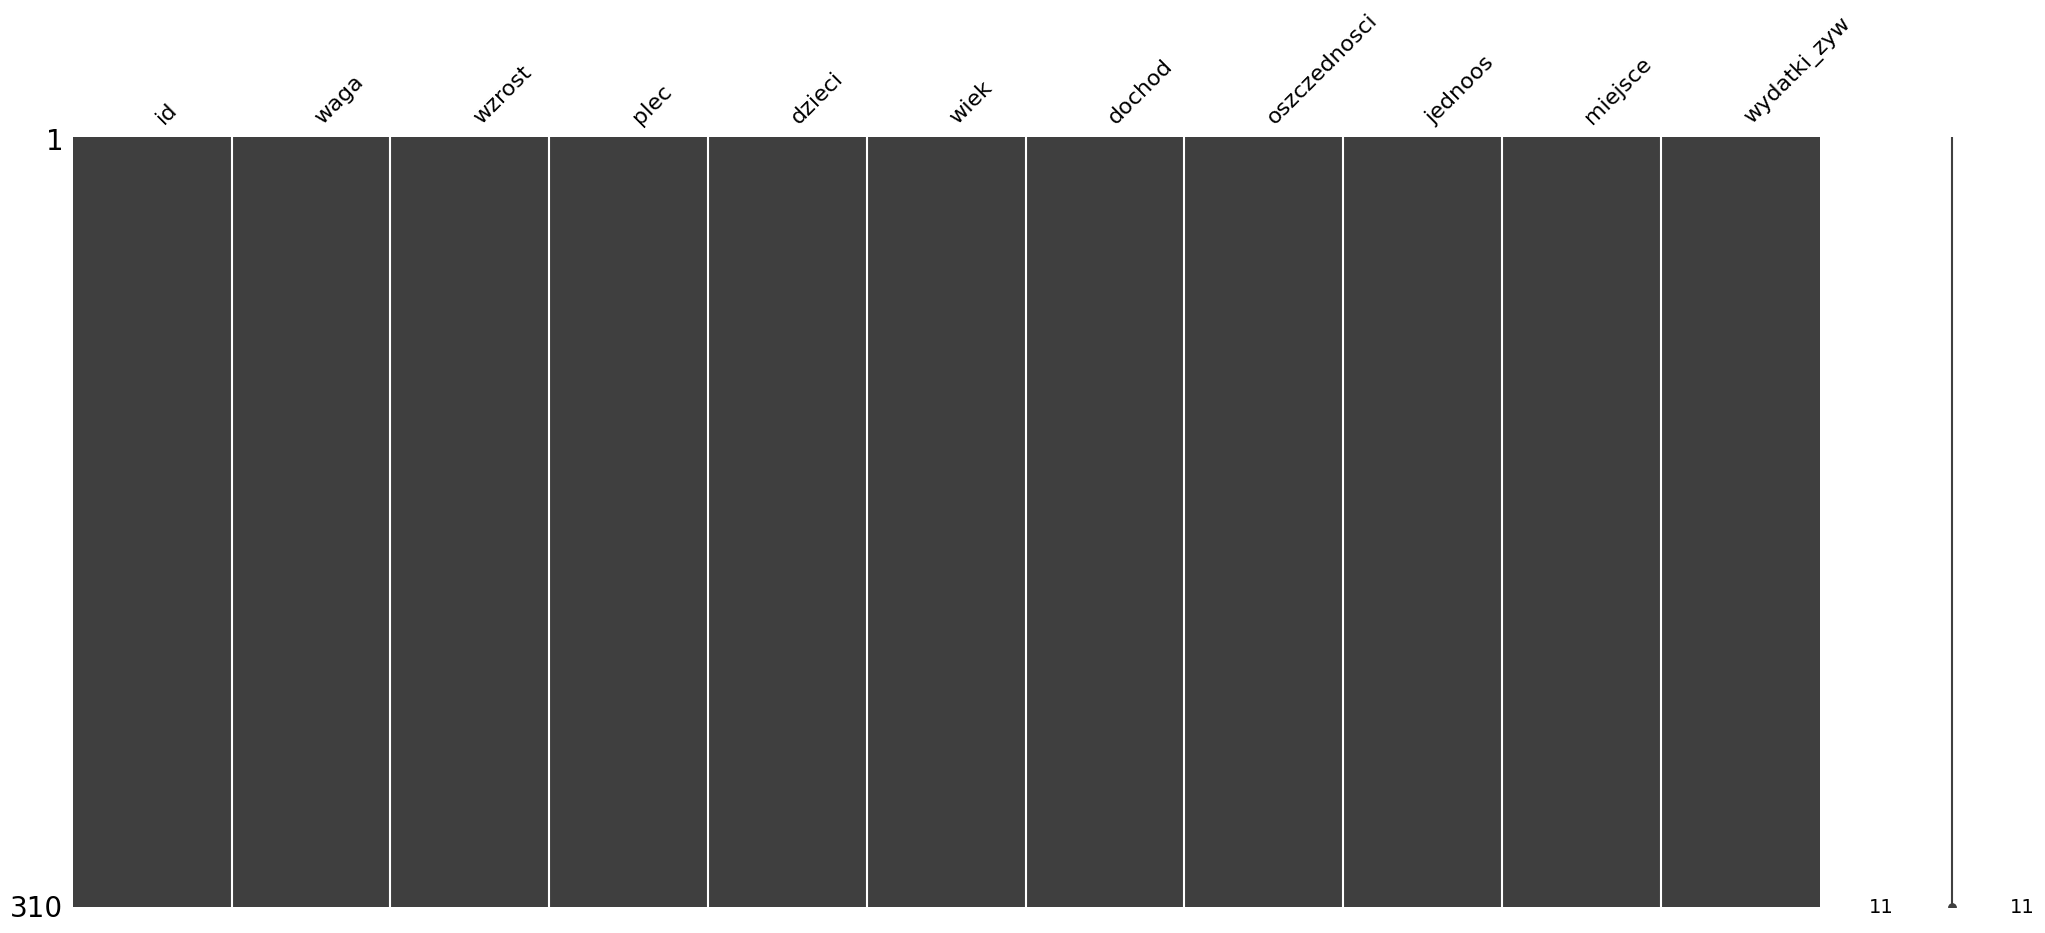

In [ ]:
msno.matrix(raw_df).plot()

Now we will look for suspicious values - generally we want to get rid of negative values (except *oszczednosci*, because negative values mean that expenses exceeded income). We assume that each row with an unexpected negative value is a random error and shouldn't be taken into consideration.

In [ ]:
negative_counts = raw_df.lt(0).sum()
print("Negative value counts in each column:")
print(negative_counts)

Negative value counts in each column:
id               0
waga             0
wzrost           0
plec             0
dzieci           0
wiek             0
dochod           0
oszczednosci    13
jednoos          0
miejsce          0
wydatki_zyw      6
dtype: int64


Turns out that only the column *wydatki_zyw* contains obvious errors, because expenses can't be negative.

In [ ]:
# Dataframe after preprocessing:
df = raw_df.rename(columns={'waga':'masa'},inplace=False).query('wydatki_zyw >= 0')
# Let's reset the index for more clarity:
df.reset_index(drop=True, inplace=True)

Now we expect 304 observations:

In [ ]:
df

,id,masa,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
299,209,81.26,179.94,2,1,55,1535.14,1066.30,1,3,249.39
300,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
301,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
302,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


Let's inspect frequencies for categorical variables and descriptive statistics for numerical variables.

**Categorical variables:**

In [ ]:
categorical = ['plec', 'jednoos', 'miejsce']
numerical = ['masa', 'wzrost', 'dzieci', 'wiek', 'dochod', 'oszczednosci', 'wydatki_zyw']
target = ['wydatki_zyw']

categorical_df = df[categorical]
numerical_df = df[numerical]

In [ ]:
for cat in categorical:
  print(categorical_df[cat].value_counts(), '\n')

# We can investigate children count as well:
print(numerical_df['dzieci'].value_counts())

plec
1    163
2    141
Name: count, dtype: int64 

jednoos
0    177
1    127
Name: count, dtype: int64 

miejsce
2    138
3     83
1     83
Name: count, dtype: int64 

dzieci
1    89
2    74
3    56
0    38
4    35
5    12
Name: count, dtype: int64


We can see that:
- there are 163 women and 141 men, so there is a tiny disproportion,
- people have mostly one or two children, surprisingly childless people are a minority
- there is a disproportion between households with one and more that one person, so statistically more people live with at least one person,
- most people live in towns with more than 10 000 but less than 100 000 citizens, smaller towns/villages or bigger cities are less popular.


**Numerical variables:**

In [ ]:
numerical_df.describe()

,masa,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,79.819309,172.805757,1.990132,56.259868,1389.315724,887.975954,235.571151
std,3.303614,6.935242,1.341112,6.782444,660.781113,668.759849,57.232769
min,68.890000,155.670000,0.000000,37.000000,645.270000,-204.240000,56.270000
25%,77.415000,167.130000,1.000000,51.750000,965.830000,384.657500,204.207500
50%,79.895000,172.890000,2.000000,56.500000,1181.350000,722.325000,250.465000
75%,82.142500,178.117500,3.000000,61.000000,1613.947500,1236.880000,284.110000
max,86.730000,190.790000,5.000000,77.000000,4780.150000,3390.590000,301.690000


Here we can see that:
- people that participated in the survey are between 37 and 77 years old - this explains the amount of people with children and generally makes sense, because the economical situation of these people is rather stable and can provide valuable insight in food expenses in the population,
- there are some poor people (645,27 of monthly income) and very wealthy people as well (4780,15 of monthly income) - observations connected with them might not be statistically important (in other words - not totally viable and applicable to the whole population),
- savings also vary - from negative (-204,24) to greater (3390,59) amounts.

In [ ]:
# Histograms:
for col in numerical_df.columns:
  plot = px.histogram(numerical_df,
                      x=col,
                      nbins=100,
                      title=f"Histogram of {col}")
  plot.show()

Values of the variables *masa*, *wzrost*, *wiek* seem to be normally distributed. It's also possible that $\log$(*dochod*) and $\log$(*oszczednosci*) are normally distributed. To check that, we will perform proper transformations and scaling.

In [ ]:
# To calculate log(oszczednosci) we need to ensure that there are no non-positive values.
scaled_numerical_df = numerical_df.copy(deep=True).query('oszczednosci > 0')
scaled_numerical_df['dochod'] = np.log(scaled_numerical_df['dochod'])
scaled_numerical_df['oszczednosci'] = np.log(scaled_numerical_df['oszczednosci'])
scaled_numerical_df = scaled_numerical_df.rename(columns={'oszczednosci':'log_oszczednosci', 'dochod':'log_dochod'}, inplace=False)

def scale_column(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

scaled_numerical_df = scaled_numerical_df.apply(scale_column)
scaled_numerical_df

,masa,wzrost,dzieci,wiek,log_dochod,log_oszczednosci,wydatki_zyw
0,-0.280110,0.489047,2.257034,0.428289,-0.755460,-0.044673,-0.667290
1,-0.361249,-1.014346,0.766008,-0.611550,-0.588498,-0.289315,0.451317
2,-1.674503,-0.210239,0.020495,0.131192,-0.161810,0.114260,0.193780
3,-0.226017,-0.510343,-0.725018,0.428289,1.548593,1.154541,0.112984
4,-0.189955,0.715920,-0.725018,-1.205743,-0.083395,-0.305459,1.005920
...,...,...,...,...,...,...,...
299,0.420092,1.026075,-0.725018,-0.165905,0.424338,0.482984,0.280496
300,-0.682801,-0.342343,0.766008,0.873934,-0.392962,-0.599404,0.984676
301,-2.245482,-1.367579,-0.725018,0.725386,-1.629636,-3.168039,0.851118
302,-0.787981,0.346892,-0.725018,0.576837,-0.260327,0.017000,0.227735


In [ ]:
# Histograms with normal distribution curves:
for col in scaled_numerical_df.columns:
  plot = px.histogram(scaled_numerical_df,
                      x=col,
                      nbins=100,
                      title=f"Histogram of {col}",
                      histnorm='probability density')
  x_values = np.linspace(scaled_numerical_df[col].min(), scaled_numerical_df[col].max(), 100)
  y_values = 1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x_values ** 2))
  plot.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', line=dict(color='red'), name='Normal Distribution'))
  plot.show()

**Komentarz**

Let's investigate **quantile-quantile plots** of these variables:

In [ ]:
for col in scaled_numerical_df.columns:
  plot = px.scatter(x=np.sort(stats.norm.ppf(np.linspace(0.01, 0.99, 291))),
                    y=np.sort(scaled_numerical_df[col]),
                    labels={'x':'Theoretical quantiles', 'y':'Dataset quantiles'},
                    title=f'Q-Q plot for variable {col}')
  plot.add_scatter(x=[-2, 2], y=[-2, 2], showlegend=False)
  plot.show()

Variable *dzieci* naturally doesn't look properly because it has only discrete values, also *log_dochod* and *wydatki_zyw* seem to have a different distribution.

## **Task 2**.: Dependencies investigation

In this task we will investigate dependencies between variables. To start with, we will analyze scatter plots for all pairs of numerical variables.

In [ ]:
scatter_matrix = px.scatter_matrix(numerical_df)
scatter_matrix.show()

We can observe:
- **strong positive correlation between *dochod* and *oszczednosci*,**
- some sort of positive correlation between *masa* and *wzrost*,
- some sort of negative correlation between *oszczednosci* and *wydatki_zyw*.

All of these observations are intuitively natural. To make sure if these variables are correlated, let's calculate correlation coefficients.

**Disclaimer**: we don't necessarily need a linear correlation here, because we only want to know, if growth of one variable implies growth of the second one. That's why we calculate Spearman's $\rho$ correlation coefficient.

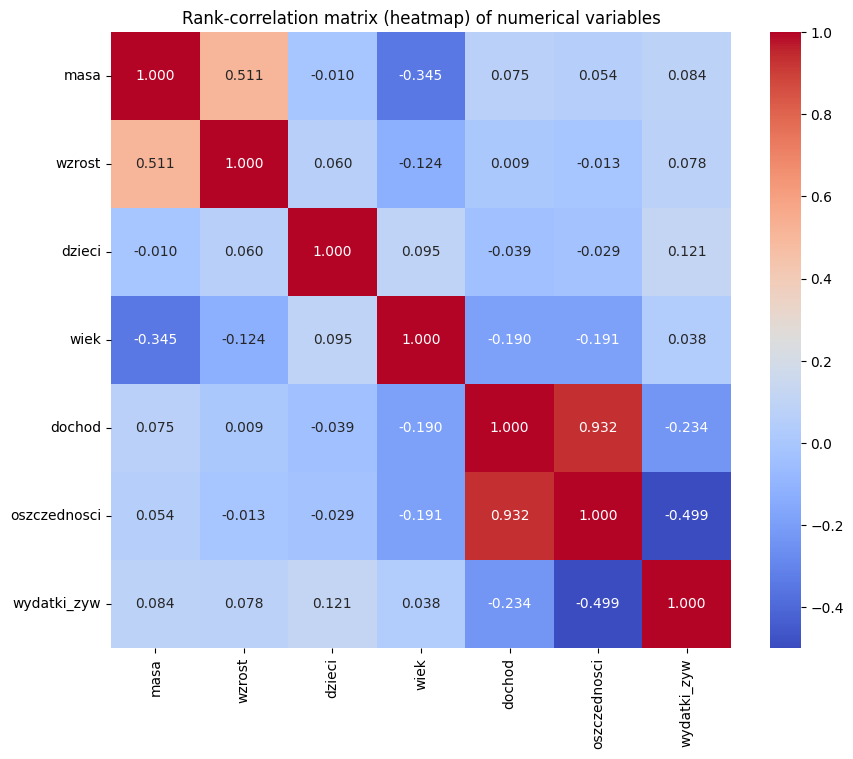

In [ ]:
correlation_matrix = numerical_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Rank-correlation matrix (heatmap) of numerical variables')
plt.show()

**Testing statistical significance of these coefficients:**

Here we are using Spearman's $\rho$ test implemented in *spearmanr* from scipy.stats. This function calculates $\rho$ - correlation coefficient (which is the same on the heatmap and below) with an associated p-value. Hypotheses are:

- H$_0$: correlation is equal to 0.
- H$_1$: correlation is not equal to 0 (which means we perform a two-sided test, which is a default option in *spearmanr* function).

A dataframe below contains p-values calculated by this function.

In [ ]:
p_values_num = pd.DataFrame(index=numerical_df.columns, columns=numerical_df.columns)
importance_num = pd.DataFrame(index=numerical_df.columns, columns=numerical_df.columns)

for col1 in numerical_df.columns:
    for col2 in numerical_df.columns:
        if col1 != col2:
            spearman_corr, p_value = spearmanr(numerical_df[col1], numerical_df[col2])
            p_values_num.loc[col1, col2] = p_value
            if p_value < 0.05:
              importance_num.loc[col1, col2] = 'YES'
            else:
              importance_num.loc[col1, col2] = 'NO'
        else:
            p_values_num.loc[col1, col2] = 0.0
            importance_num.loc[col1, col2] = '-'

p_values_num

,masa,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
masa,0.0,0.0,0.859066,0.0,0.194203,0.352264,0.143551
wzrost,0.0,0.0,0.298108,0.030457,0.878648,0.826695,0.172868
dzieci,0.859066,0.298108,0.0,0.098749,0.501029,0.61452,0.034649
wiek,0.0,0.030457,0.098749,0.0,0.00087,0.000842,0.510113
dochod,0.194203,0.878648,0.501029,0.00087,0.0,0.0,0.000037
oszczednosci,0.352264,0.826695,0.61452,0.000842,0.0,0.0,0.0
wydatki_zyw,0.143551,0.172868,0.034649,0.510113,0.000037,0.0,0.0


We can briefly summarize if correlation coefficients are statistically significant (at a significance level $\alpha=0,05$):

In [ ]:
importance_num

,masa,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw
masa,-,YES,NO,YES,NO,NO,NO
wzrost,YES,-,NO,YES,NO,NO,NO
dzieci,NO,NO,-,NO,NO,NO,YES
wiek,YES,YES,NO,-,YES,YES,NO
dochod,NO,NO,NO,YES,-,YES,YES
oszczednosci,NO,NO,NO,YES,YES,-,YES
wydatki_zyw,NO,NO,YES,NO,YES,YES,-


To determine if any two categorical variables are dependent (and it's statistically significant), we will use $\chi^2$ test:
- H$_0$: Variables are independent.
- H$_1$: Variables are not independent.

In [ ]:
from scipy.stats import chi2_contingency

tested = []

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2 and ((col1, col2) not in tested or (col2, col1) not in tested):
            contingency_table = pd.crosstab(categorical_df[col1], categorical_df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f'Variables: "{col1}", "{col2}"; p-value = {p}')
            tested.append((col1, col2))
            tested.append((col2, col1))

Variables: "plec", "jednoos"; p-value = 0.7098649541109077
Variables: "plec", "miejsce"; p-value = 0.22342423171950018
Variables: "jednoos", "miejsce"; p-value = 0.7695667530897057


Seems like we can't reject any of the results, so we can't assume that any pair of categorical variables is dependent.

## **Task 3**.: Plots

In this task we will analyze some plots.

In [ ]:
# Scatter-plots
for col in numerical_df.columns:
  if col != 'wydatki_zyw':
    px.scatter(numerical_df, x=col, y='wydatki_zyw', title=f"{col} vs wydatki_zyw").show()

We have observed these plots in a scatter-matrix, but here the results can be observed in detail.

- As we can expect, variables *masa* and *wzrost* don't seem to be correlated with *wydatki_zyw* (although bigger mass could, potentially, influence expenses on food).
- Variable *wiek* also doesn't seem to influence *wydatki_zyw* - intuitively we would expect some correlation here, but based on the observations and correlation coefficient there is not enough evidence to say that this dependency is statistically significant.
- Two last numerical variables - *dochod* and *oszczednosci* are somehow correlated with *wydatki_zyw* (based on the plots and correlation coefficients). What's interesting - in both cases this correlation is negative. This is natural in case of savings, because if expenses on food are big, monthly savings tend to be small. Looking at the plot, this correlation is not exactly linear and even clear, but there is a visible tendency. In case of *dochod* we can see two clusters of observations:
  - First cluster creates a constant linear trend,
  - second cluster creates a decreasing trend that might be linear as well. It's a bit counter-intuitive, because with bigger earnings come bigger expenses in daily life. Generally, correlation coefficient here is negative.

- Speaking about last two variables: my interpretation would be that the first (smaller) cluster represents people with families, that regardlessly of their incomes, spend a constant amount of money on food each month. The second cluster could represent richer people with less children (even 0), so they naturally tend to spend less on food. That can lead to a conlusion that number of children and monthly earnings are negatively correlated.

In [ ]:
# Box plots:
for col in numerical_df.columns:
  px.box(df, x='miejsce', y=f'{col}', title=f'Box plots of {col} for all types of miejsce').show()

I decided to prepare boxplots for all numerical variables, because in can be valuable for the exploratory analysis. Here are some conclusions:

- Considering *masa* and *wzrost*, these parameters are slightly higher for people living in bigger towns and cities, but these differences don't necessarily have to mean anything, because the second category (10 000 - 100 000 inhabitants) includes a wide range of towns. Among them there can be no growth, but we don't know that.

- Variable *wiek* is more interesting - in villages and small towns below 10 000 inhabitants (first category) the median of age is around 57, in cities bigger than 100 000 inhabitants - this median is around 55. Quartiles are also a bit lower, so we can conclude that age is the parameter that is lower in cities of third category. It's rather natural, because young adults tend to choose bigger cities. Smaller cities and towns (second category) is similar to the first category, but the difference between minimum and maximum age is smaller.

- Medians of *dochod* are similar, but the highest values can be observed in medium-sized towns and cities. Quartiles there are even higher than in the biggest cities, so there may be some correlation that the people with best incomes prefer living in small and medium-sized communities. Proportions of *oszczednosci* are quite similar to *dochod*.

- Considering *wydatki_zyw*, there are some minor differences in medians, but the quartiles show that there is a growth of food expenses with a growth of town or city.

In [ ]:
# Stacked bar chart:
grouped_df = df[['plec', 'jednoos']].groupby(['plec', 'jednoos']).size().reset_index(name='count')
px.bar(grouped_df,
       x='plec',
       y='count',
       barmode='stack',
       color='jednoos',
       title="Stacked bar chart for plec and jednoos").show()

Here we can clearly see that there are more women in this data set. They mostly don't live alone (more than a half of them). Among men this proportion is closer to being a half, but the majority of this society lives in households with other people.

Additionally I created a plot showing a dependency between **economical class and number of children** (in task 5.).

## **Task 4**.: Confidence intervals

In this task we will calculate confidence intervals at a confidence level $1-\alpha=0,99$ for the following descriptive statistics of the variable *wiek*:
- mean,
- standard deviation,
- quartiles 1, 2 and 3.

As we have shown earlier, variable *wiek* (with high probability) is normally distributed. Let's write down its descriptive statistics:



In [ ]:
age_df = df['wiek']
age_df.describe()

count    304.000000
mean      56.259868
std        6.782444
min       37.000000
25%       51.750000
50%       56.500000
75%       61.000000
max       77.000000
Name: wiek, dtype: float64

**1. MEAN**

We will use the equation from parameter estimation lab (for unknown mean and variance):

$$\left (\hat{\mu} - t_{1-\alpha/2, N-1}\frac{\hat{\sigma}}{\sqrt{N}},\quad \hat{\mu} + t_{1-\alpha/2, N-1}\frac{\hat{\sigma}}{\sqrt{N}} \right ), $$
where $t_{1-\alpha/2, N-1}$ is the quantile of the Student's $t$ distribution with $N-1$ degrees of freedom at the level of $1-\alpha/2$, and $\hat{\sigma}$ is the square root of the **unbiased** estimator of the variance: $\hat{\sigma} = \sqrt{\sum_{i=1}^N (X_i - \bar{X})^2/(N-1)}$, where $\bar{X} = \hat{\mu} = \sum_{i=1}^N X_i/N$.

To make sure that our estimator of the variance is unbiased, we will calculate it manually:

In [ ]:
mean = age_df.mean()
n = age_df.count()
variance_estimator = age_df.apply(lambda x: (x - mean)**2).sum() / (n - 1)
np.sqrt(variance_estimator)

6.782444430872793

Turns out that *std* from *age_df.describe()* is a square root of the unbiased estimator of the variance.

In [ ]:
def t_student_conf_interval(alpha, n, mean, sd):
  # SD unknown - studentized confidence interval calculation:
  pr = 1 - (alpha/2)
  quantile = tstud.ppf(pr, df=n-1)
  crit = (quantile * sd / np.sqrt(n))
  ci_t_lower = mean - crit
  ci_t_upper = mean + crit
  return ci_t_lower, ci_t_upper

In [ ]:
mean_lower, mean_upper = t_student_conf_interval(0.01, age_df.count(),
                                                 age_df.mean(), age_df.std())
print(f"Mean confidence interval at 1 - alpha = 0.99: ({mean_lower}, {mean_upper})")

Mean confidence interval at 1 - alpha = 0.99: (55.25152156054645, 57.26821528155881)


The assumptions were:
- normal distribution of *wiek*,
- random sample, (*próba prosta*)
- unknown mean and standard deviation of *wiek*

**2. STANDARD DEVIATION**

We don't know the mean and the variance, so we can use the equation for a confidence interval of the variance from the first lecture:

$$\left (\frac{nS_n^2}{\chi^2(1-\frac{\alpha}{2}, n-1)} ,\quad \frac{nS_n^2}{\chi^2(\frac{\alpha}{2}, n-1)} \right ),$$

where $\chi^2(\alpha, n-1)$ is a quantile of chi-squared distribution with $n-1$ level of freedom at the $1-\alpha$ significance level.

$S_n^2$ is a biased estimator of the variance:

$$S_n^2 = \frac{1}{n}\sum_{i=1}^n(X_i - \overline{X}_n)^2$$

That means that a confidence interval of the standard deviation is:

$$\left (\sqrt{\frac{nS_n^2}{\chi^2(1-\frac{\alpha}{2}, n-1)}} ,\quad \sqrt{\frac{nS_n^2}{\chi^2(\frac{\alpha}{2}, n-1)}} \right ),$$

In [ ]:
def variance_conf_interval(alpha, n, var_est):
  # SD unknown - studentized confidence interval calculation:
  pr_lower = 1 - (alpha/2)
  pr_upper = alpha/2
  quantile_lower = chi2.ppf(pr_lower, df=n-1)
  quantile_upper = chi2.ppf(pr_upper, df=n-1)
  ci_lower = n * var_est / quantile_lower
  ci_upper = n * var_est / quantile_upper
  return ci_lower, ci_upper

In [ ]:
biased_var_est = age_df.apply(lambda x: (x - mean)**2).sum() / age_df.count()
var_lower, var_upper = variance_conf_interval(0.01, age_df.count(), biased_var_est)
print(f"SD confidence interval at 1 - alpha = 0.99: ({np.sqrt(var_lower)}, {np.sqrt(var_upper)})")

SD confidence interval at 1 - alpha = 0.99: (6.136394836972781, 7.568207600724594)


The assumptions also were:
- normal distribution of *wiek*,
- random sample, (*próba prosta*)
- unknown mean and standard deviation of *wiek*

## **Task 5.**.: Economical classes

In this task we will discuss the differences in food expenses between four economical classes of the considered society, described as follows:

- lower class (income below 25th percentile of income distribution),
- middle class (income between 25th and 75th percentiles of income distribution),
- upper middle class (income between 75th and 90th percentiles of income distribution),
- upper class (income above 90th percentile of income distribution).

Let's divide the dataframe:

In [ ]:
income_df = df['dochod']
perc25 = income_df.quantile(0.25)
perc75 = income_df.quantile(0.75)
perc90 = income_df.quantile(0.90)
print(f"Percentiles: {perc25}, {perc75}, {perc90}")

classes_df = df.copy(deep=True)

def assign_value(x):
    if x < perc25:
        return 1
    elif x >= perc25 and x < perc75:
        return 2
    elif x >= perc75 and x < perc90:
        return 3
    else:
        return 4

classes_df['klasa'] = classes_df['dochod'].apply(assign_value)

Percentiles: 965.83, 1613.9475, 2194.527


We can draw boxplots for each class:

In [ ]:
px.box(classes_df, x='klasa', y='wydatki_zyw')

We will calculate standard deviation of food expenses in all classes, because it's more interpretable than variance.

In [ ]:
std_by_class = classes_df.groupby('klasa')['wydatki_zyw'].std()
std_by_class

klasa
1    31.333049
2    59.344931
3    65.869815
4    56.083263
Name: wydatki_zyw, dtype: float64

Mean values:

In [ ]:
mean_by_class = classes_df.groupby('klasa')['wydatki_zyw'].mean()
mean_by_class

klasa
1    258.610132
2    231.226645
3    201.490444
4    249.862581
Name: wydatki_zyw, dtype: float64

The results are quite unexpected:

- People from lower class spend the biggest amount of money on food (mean: 258,61) and standard deviation of these expenses is relatively low (31,33), which means people from this class have stronger and visible habit of spending more on food than people from higher classes.
- People from middle class have lower mean expenses (231,22), but standard deviation is higher (59,34) - that means people from this class generally spend less money on food, but this mean is a bit less informative, because values of expenses are spread more. There exist people that spend even more than an average representant of the lower class, but there also exist people that spend much less.
- People from upper-middle class have the lowest (!) mean expenses (201,49), which is a significant difference comparing to middle or lower class. Although standard deviation is the highest (65,86), it's not much higher than for middle class. Considering the difference between means of middle and upper-middle classes, we can conclude that this class spends the smalles amount of money on food.
- People from upper class spend on average 249,86, which is still less than people from lower class. Standard deviation (56,08) is similar to middle class. Looking at the boxplot, there exist people in upper class that spend the biggest amount of money in a whole population, which is rather expected. Also a median here is the highest.

Conclusion (standard deviation of food expenses among classes):
- biggest: 65,86 (upper-middle class)
- 59,34 (middle class)
- 56,08 (upper class)
- smallest: 31,33 (lower class)

**Addition: children by economical class:**

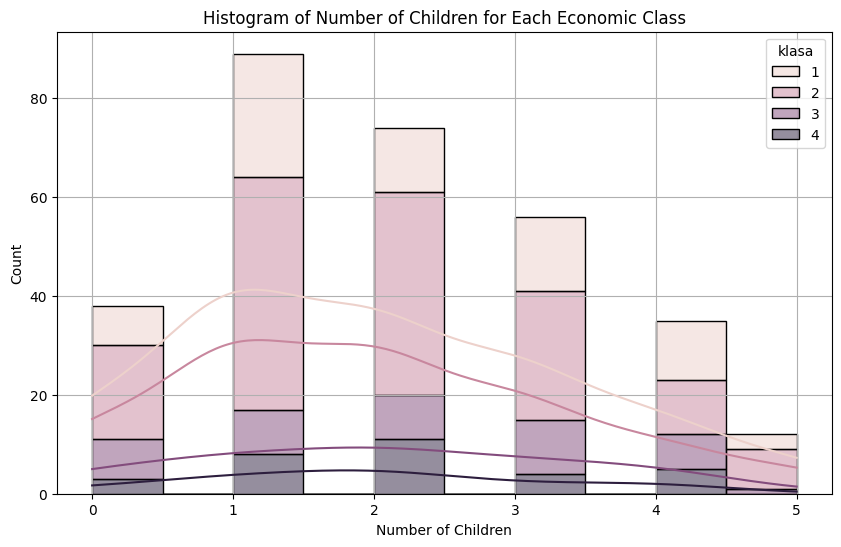

In [ ]:
children_df = classes_df[['dzieci', 'klasa']]
# Create histograms for each economical class
plt.figure(figsize=(10, 6))
sns.histplot(data=children_df, x='dzieci', hue='klasa', multiple='stack', kde=True)
plt.title('Histogram of Number of Children for Each Economic Class')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Upper-middle and upper class seem to have the smallest number of children.

## **Task 6**.: Statistical tests

In this task we will perform some statistical tests.

**1. Do women have on average higher savings than men?**

Assumptions:
- two independent samples,
- normal distribution of samples (**violated assumption**)
- variances of both samples are different (we can assume that based on the calculations below):

In [ ]:
# Prepare samples:
women_savings = df.query("plec == 1")['oszczednosci']
men_savings = df.query("plec == 2")['oszczednosci']

# Plot histograms:
px.histogram(women_savings, nbins=40).show()
px.histogram(men_savings, nbins=40).show()

As we can see, these values are not distributed normally. As we have already seen, if we apply logarythmic transformation to this dataset, we get a normal distribution (at least - visually). Let's transform both datasets:

In [ ]:
women_savings_transformed = np.log(women_savings.copy(deep=True)[women_savings > 0])
men_savings_transformed = np.log(men_savings.copy(deep=True)[men_savings > 0])

Now we can plot this data:

In [ ]:
px.histogram(women_savings_transformed, nbins=40).show()
px.histogram(men_savings_transformed, nbins=40).show()

In [ ]:
# Calculate standard deviation:
print("Women: ", women_savings_transformed.std(), "\nMen: ", men_savings_transformed.std(), "\n")

Women:  0.8814950270293118 
Men:  0.8625991510962624 



That leads to two-sample t-test (that determines if means of two samples are equal). As we can see, standard deviations of the samples are almost equal (so do the variances) - this means we can perform standard two-sample t-test.

- Disclaimer: with an assumption of different variances, results of Welch's t-test are almost the same and p-value is far from $\alpha = 0.01$.

H$_0$: average savings of women $\leq$ average savings of men

H$_1$: average savings of women $>$ average savings of men

In [ ]:
means_t, means_p = ttest_ind(women_savings_transformed, men_savings_transformed, equal_var=True, alternative='greater')
if means_p < 0.01:
  print(f"{means_p} < 0.01 => rejected")
else:
  print(f"{means_p} >= 0.01 => not enough evidence to reject")

0.2752363543703282 >= 0.01 => not enough evidence to reject


**Conclusion:** there is no evidence to reject the null hypothesis (that average savings of women $\leq$ average savings of men).



**2. Is the lower proportion of food expenses to income correlated with higher savings?**

A goal of this test is to show that variables: *wydatki_zyw* /*dochod* and *oszczednosci* are negatively correlated. We also want to show that this correlation is statistically significant. This means we will perform Spearman's $\rho$ test, because similarly to task 2., we don't necessarily expect this trend to be linear. We only want to know if growth of savings implies lower value of the ratio expenses/income.

Spearman's $\rho$ test is implemented in *spearmanr* from scipy.stats. This function calculates $\rho$ - correlation coefficient with an associated p-value. Hypotheses are:

- H$_0$: correlation is equal to 0 (or is positive).
- H$_1$: correlation is negative (less than zero, so we will use 'less' as an alternative hypothesis in *spearmanr* function).

In [ ]:
# Prepare new dataframe:
correlation_test_df = df.copy(deep=True)[['wydatki_zyw', 'dochod', 'oszczednosci']]
correlation_test_df['w/d'] = correlation_test_df.loc[:, 'wydatki_zyw'] / correlation_test_df.loc[:, 'dochod']
correlation_test_df

,wydatki_zyw,dochod,oszczednosci,w/d
0,194.96,979.01,673.17,0.199140
1,259.20,1043.36,543.89,0.248428
2,244.41,1227.69,773.20,0.199081
3,239.77,2356.74,1914.74,0.101738
4,291.05,1264.95,536.29,0.230088
...,...,...,...,...
299,249.39,1535.14,1066.30,0.162454
300,289.83,1124.12,415.07,0.257828
301,282.16,701.51,44.23,0.402218
302,246.36,1182.43,710.35,0.208351


In [ ]:
corr_coef, p_val = spearmanr(correlation_test_df['w/d'], correlation_test_df['oszczednosci'], alternative='less')

print(f"Correlation coefficient: {corr_coef}")
if p_val < 0.01:
  print(f"{p_val} < 0.01 => rejected")
else:
  print(f"{p_val} >= 0.01 => not enough evidence to reject")

Correlation coefficient: -0.9726091116445553
1.0051878374557008e-193 < 0.01 => rejected


Turns out that p-value is negligible. That means we definitely reject the hypothesis that these two variables are not correlated. **We support the alternative hypothesis that they are negatively correlated.**

**3. Is an average woman's body mass more than 56 kg?**

In this test we will check if women's mass is on average more than 56 kg.

Let's plot necessary data:

In [ ]:
women_mass = df.query("plec == 1")['masa']
px.histogram(women_mass, nbins=40)

We can assume that this data has a normal distribution, which is the only assumption we need for a standard t-test.

H$_0$: average mass $\leq$ 56 kg.

H$_1$: average mass $>$ 56 kg.

In [ ]:
mass_t, mass_p = ttest_1samp(women_mass, 56, alternative='greater')
if mass_p < 0.01:
  print(f"{mass_p} < 0.01 => rejected")
else:
  print(f"{mass_p} >= 0.01 => not enough evidence to reject")

1.5711163348632539e-152 < 0.01 => rejected


In case of this test, p-value is also negligibly small. That means we reject the null hypothesis and **support the alternative hypothesis, that an average woman's body mass is greater than 56 kg**.

**4. Additional hypothesis: does women's body mass has a normal distribution?**

I decided to check precisely, if assumptions of the previous test were appropriate. We will use Shapiro-Wilk test of normality.

H$_0$: Data comes from a normal distribution.

H$_1$: Data doesn't come from a normal distribution.

In [ ]:
norm_t, norm_p = shapiro(women_mass)
if norm_p < 0.01:
  print(f"{norm_p} < 0.01 => rejected")
else:
  print(f"{norm_p} >= 0.01 => not enough evidence to reject")

0.6817423105239868 >= 0.01 => not enough evidence to reject


We don't have the evidence to reject that women's body mass is distributed normally, so the previous test's assumptions were rather appropriate.

## **Task 7**.: Building linear model

In this task we will build a linear model to predict food expenses based on all variables.

In [ ]:
model = df.copy(deep=True).drop('id', axis=1)
model = sm.add_constant(model)
for cat in categorical:
  dummy_df = pd.get_dummies(df.copy(deep=True)[cat], drop_first=True)
  for i, col in enumerate(dummy_df.columns, start=2):
    dummy_df = dummy_df.rename(columns={col: f"{cat}_{i}"})
  model = pd.concat([model, dummy_df], axis=1)

# Split the data:
model_x = model.copy(deep=True).drop(['plec', 'jednoos', 'miejsce', 'wydatki_zyw'], axis=1)
model_y = pd.DataFrame(model.copy(deep=True)['wydatki_zyw'])

model_x_train, model_x_test, model_y_train, model_y_test = train_test_split(model_x, model_y, train_size=0.8)

# Regression:
entry_model = sm.OLS(model_y_train, model_x_train.astype(float))
entry_results = entry_model.fit()
print(entry_results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     47.58
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.09e-50
Time:                        06:19:51   Log-Likelihood:                -1198.9
No. Observations:                 243   AIC:                             2420.
Df Residuals:                     232   BIC:                             2458.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          243.7857    107.708      2.263   

Some conclusions:

- $R^2$ is 0,694, which means that around 69,4% of variance is explained by the model,

- Prob (F-statistic) is a p-value in a joint-significance test of a model. Null hypothesis is that the model is jointly insignificant. As we can see, p-value is negligible here, so we reject the null hypothesis at $\alpha = 0,01$ and support an alternative hypothesis that the model is jointly significant.

- Column *P > |t|* means the same but in test of individual significance of all variables. Turns out that at $\alpha = 0,01$ only *dochod* and *oszczednosci* are individually significant.

Now we will check if this model satisfies the assumptions of linear regression model:

- Linear trend,
- Independent residuals (lack of autocorrelation),
- Normally distributed residuals,
- Equal variance of residuals for all values of independent variables (homoscedasticity).


**1. Linear trend**

To check that the model's functional form is correct, we will perform Ramsey RESET test:

$$H_0:X\beta+\varepsilon$$
$$H_1:f(X\beta)+\varepsilon$$

where f() is non-linear.

In [ ]:
print(sm.stats.diagnostic.linear_reset(entry_results, test_type='fitted'))

<Wald test (chi2): statistic=211.29995989585805, p-value=1.3085692042195727e-46, df_denom=2>


Turns out that we have to reject the null hypothesis at any reasonable level. This means that the functional form is probably not linear. We have to remember that RESET is designed for small-sized samples - if the sample is big enough, it tends to reject the null hypothesis. Here we have more than 200 observations, so that's possible that RESET doesn't work properly.

We can also draw a plot of residuals vs fitted values:

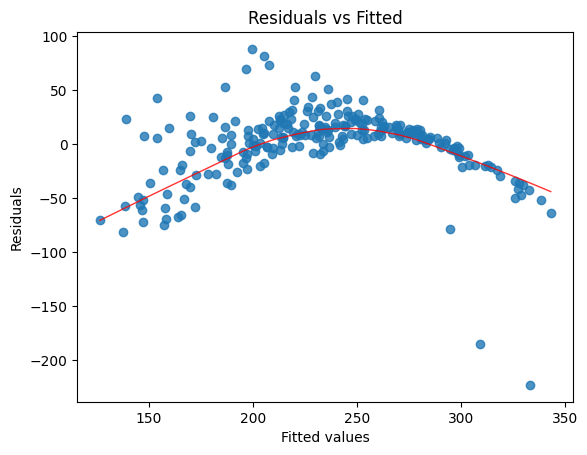

In [ ]:
# model values
entry_model_fitted_y = entry_results.fittedvalues
# model residuals
entry_model_residuals = entry_results.resid

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=entry_model_fitted_y, y=entry_model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

Unfortunately, it's not a cloud of evenly spread points along $y=0$, so we can assume with some certainty that this trend is not linear.

**2. Homoscedasticity and lack of autocorrelation**

To check this assumption, we will draw a plot of root square of the absolute value of standardized residuals vs the fitted value.

This plot checks the variance's homoscedasticity (equality for all values of the independent variables). We expect values to be distributed symmetrically across a straight horizontal line.

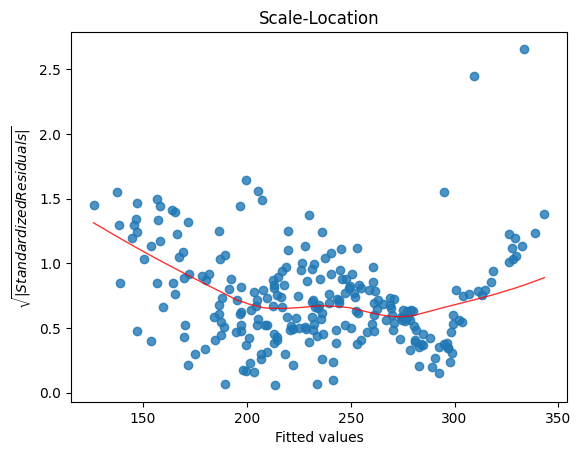

In [ ]:
# normalized residuals
entry_model_norm_residuals = entry_results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
entry_model_norm_residuals_abs_sqrt = np.sqrt(np.abs(entry_model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=entry_model_fitted_y, y=entry_model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Seems like the data is not homoscedastic.

To check if there are problems with autocorrelation, we can plot residuals vs number of observations:

In [ ]:
fig = px.line(x=range(len(entry_model_residuals)), y=entry_model_residuals, title='Residuals vs number of observations')
fig.add_shape(type='line', x0=0, y0=0, x1=len(entry_model_residuals), y1=0,
                line=dict(color='red', width=3))
fig.show()

Based on the information from 6th lab, there is rather no autocorrelation, because this wave doesn't oscillate in some particular way and there's no trend. There are some bigger fluctuations, but overall trend is rather random.

**3. Normally distributed residuals**

To check this, we can draw a histogram of residuals:

In [ ]:
px.histogram(entry_model_residuals, histnorm='probability density')

These residuals seem to be distributed normally with some higher shots around 0, so we can conclude that this assumption is (roughly) satisfied.

**4. Lack of multicolinearity**



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = model_x_train.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(model_x_train.values.astype(float), i)
                         for i in range(len(model_x_train.columns))]

print(vif_data)

         feature          VIF
0          const  2381.788877
1           masa     1.753952
2         wzrost     2.203776
3         dzieci     1.034643
4           wiek     1.226722
5         dochod     8.503537
6   oszczednosci    10.793468
7         plec_2     2.676742
8      jednoos_2     2.511027
9      miejsce_2     1.483355
10     miejsce_3     1.497821


There are some problems with VIFs (some are larger or close to 10), so there may be problems with multicollinearity.

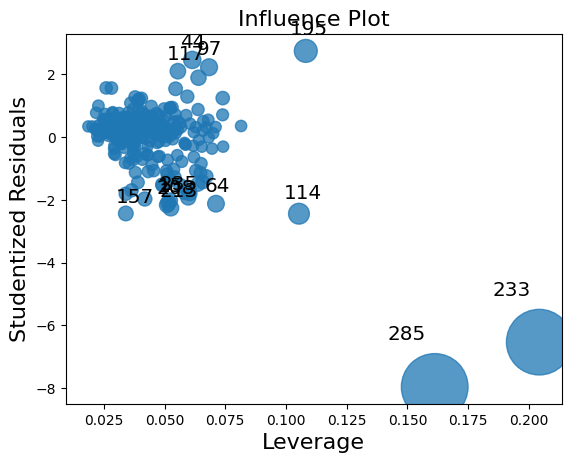

In [ ]:
sm.graphics.influence_plot(entry_results, criterion="cooks").show()

There are some influential observations (bottom right corner), so this assumption is also violated.

**Outliers**

Now we will find and remove outliers. For each numerical variable we will calculate interquartile range $IQR = Q_3 - Q_1$ and remove observations that fall below $Q_1 - 1,5\cdot IQR$ or above $Q_3 + 1,5 \cdot IQR$.

In [ ]:
# Create a better model:
b_model = model.copy(deep=True)

for col in numerical:
  Q1 = model[col].quantile(0.25)
  Q3 = model[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  b_model = b_model.query(f"{col} >= {lower_bound} and {col} <= {upper_bound}")

b_model

,const,masa,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw,plec_2,jednoos_2,miejsce_2,miejsce_3
0,1.0,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96,True,False,False,True
1,1.0,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20,False,False,True,False
2,1.0,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41,False,False,False,False
3,1.0,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77,False,True,True,False
4,1.0,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,81.26,179.94,2,1,55,1535.14,1066.30,1,3,249.39,True,True,False,True
300,1.0,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83,True,False,False,True
301,1.0,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16,False,False,True,False
302,1.0,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36,True,False,False,True


**Creating a better model:**

We can scale all numerical columns (I also tried applying some transformations, but what I was getting was significantly worse than the entry model):

In [ ]:
# To calculate log(oszczednosci) we need to ensure that there are no non-positive values.
b_model_scaled = b_model.copy(deep=True).drop('const', axis=1)
b_model_scaled = b_model_scaled.query('dochod > 0 and oszczednosci > 0')

def scale_column(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

for col in b_model_scaled:
  b_model_scaled[col] = scale_column(b_model_scaled[col])

b_model_scaled = sm.add_constant(b_model_scaled)
b_model_scaled.head()

,const,masa,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw,plec_2,jednoos_2,miejsce_2,miejsce_3
0,1.0,-0.282684,0.468285,1.049098,2.247120,0.435832,-0.706848,-0.245935,-0.780237,1.323834,-0.759008,1.049098,-0.780237,-0.892712,1.586614
1,1.0,-0.364642,-1.029876,-0.949548,0.754758,-0.646050,-0.547599,-0.512464,-0.780237,-0.015393,0.457609,-0.949548,-0.780237,1.115890,-0.627858
2,1.0,-1.691147,-0.228567,-0.949548,0.008577,0.126723,-0.091430,-0.039708,-0.780237,-1.354621,0.177507,-0.949548,-0.780237,-0.892712,-0.627858
3,1.0,-0.228045,-0.527627,-0.949548,-0.737604,0.435832,2.702678,2.313746,1.276751,-0.015393,0.089632,-0.949548,1.276751,1.115890,-0.627858
4,1.0,-0.191619,0.694369,1.049098,-0.737604,-1.264268,0.000779,-0.528133,1.276751,1.323834,1.060804,1.049098,1.276751,-0.892712,1.586614


In [ ]:
# Now we can split this set:
b_model_x = b_model_scaled.copy(deep=True).drop(['plec', 'jednoos', 'miejsce', 'wydatki_zyw'], axis=1)
b_model_y = pd.DataFrame(b_model_scaled.copy(deep=True)['wydatki_zyw'])

b_model_x_train, b_model_x_test, b_model_y_train, b_model_y_test = train_test_split(b_model_x, b_model_y, train_size=0.8)
b_model_x

,const,masa,wzrost,dzieci,wiek,dochod,oszczednosci,plec_2,jednoos_2,miejsce_2,miejsce_3
0,1.0,-0.282684,0.468285,2.247120,0.435832,-0.706848,-0.245935,1.049098,-0.780237,-0.892712,1.586614
1,1.0,-0.364642,-1.029876,0.754758,-0.646050,-0.547599,-0.512464,-0.949548,-0.780237,1.115890,-0.627858
2,1.0,-1.691147,-0.228567,0.008577,0.126723,-0.091430,-0.039708,-0.949548,-0.780237,-0.892712,-0.627858
3,1.0,-0.228045,-0.527627,-0.737604,0.435832,2.702678,2.313746,-0.949548,1.276751,1.115890,-0.627858
4,1.0,-0.191619,0.694369,-0.737604,-1.264268,0.000779,-0.528133,1.049098,1.276751,-0.892712,1.586614
...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,0.424584,1.003445,-0.737604,-0.182386,0.669430,0.564561,1.049098,1.276751,-0.892712,1.586614
300,1.0,-0.689438,-0.360211,0.754758,0.899495,-0.347739,-0.778046,1.049098,-0.780237,-0.892712,1.586614
301,1.0,-2.267889,-1.381879,-0.737604,0.744941,-1.393590,-1.542587,-0.949548,-0.780237,1.115890,-0.627858
302,1.0,-0.795680,0.326625,-0.737604,0.590386,-0.203436,-0.169282,1.049098,-0.780237,-0.892712,1.586614


In [ ]:
# Regression:
better_model = sm.OLS(b_model_y_train, b_model_x_train.astype(float))
better_results = better_model.fit()
print(better_results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     170.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.63e-91
Time:                        06:47:43   Log-Likelihood:                -64.104
No. Observations:                 208   AIC:                             150.2
Df Residuals:                     197   BIC:                             186.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0128      0.023     -0.547   

$R^2$ is bigger here and after many attempts these transformations gave best results. What we have done:

- removing outliers in each column,
- scaling each column.

It means that almost 90% of the variance is explained by the model.

**Interpretation of two chosen coefficients:**

We can see that coefficient of variable *dochod* is 2,0903. This means that if this variable's value grows by 1, the endogenous variable *wydatki_zyw* grows by approximately 2,1.

Coefficient of variable *oszczednosci* is -2,4533. This means that if this variable's value grows by 1, the endogenous variable *wydatki_zyw* decreases by approximately 2,5.

These results, looking at the individual significance of the variables, provide biggest insight in model's functioning and is quite informative. This is why the linear regression is highly interpretable.

**Disclaimer:** I didn't really have time to finish this task properly and I don't want to show any artificial or unchecked results, so I skipped the last subtask.